In [19]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import urllib
import sys
import time
import pytesseract
import time
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import Select
from selenium.webdriver.firefox.firefox_binary import FirefoxBinary
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.action_chains import ActionChains

from PIL import Image
from pytesseract import image_to_string
from selenium.common.exceptions import NoSuchElementException,ElementClickInterceptedException 
from PIL import Image, ImageFilter
from datetime import datetime
from selenium.webdriver.firefox.options import Options

from utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
URL_SCRAPING = 'https://www.sunarp.gob.pe/seccion/servicios/detalles/0/c3.html'
GECKO_PATH = 'geckodriver.exe'
FIREFOX_PATH = os.environ['FIREFOX_HOME']
CAPTCHA_PATH = 'img/captchas'

binary = FirefoxBinary(FIREFOX_PATH + r'\firefox.exe')

profile = webdriver.FirefoxProfile()
profile.set_preference("dom.disable_beforeunload", True)
options = Options()
options.add_argument("--headless")

profile.set_preference("browser.tabs.remote.autostart", False)
profile.set_preference("browser.tabs.remote.autostart.1", False)
profile.set_preference("browser.tabs.remote.autostart.2", False)
profile.set_preference("browser.tabs.remote.force-enable", False)

In [3]:
driver = instance_driver(options, profile, binary, GECKO_PATH)
load_page(driver, URL_SCRAPING)
navigate_to_form(driver, xpath = '//div//a')

In [4]:
driver.save_screenshot("wat.png")

True

In [5]:
captcha_element = driver.find_element_by_id("ctl00_MainContent_captch_cv")

In [11]:
save_image_path = f"{os.getcwd()}\\img\\captchas\\screenshot.PNG"
get_captcha(driver, captcha_element, save_image_path)

In [15]:
transform_image(save_image_path,f'{os.getcwd()}\\img\\processed\\for_ocr','png')

In [87]:
img = cv2.imread(save_image_path)
img = np.array(img, dtype=np.uint8)

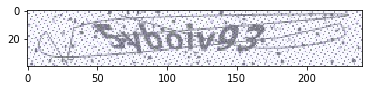

In [88]:
plt.imshow(img)

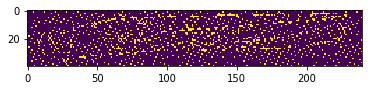

In [203]:
binary_mask = cv2.inRange(img, (120, 150, 150), (255, 187, 255))
plt.imshow(binary_mask)

In [204]:
masked = binary_mask.copy()
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
masked = cv2.dilate(binary_mask, kernel)

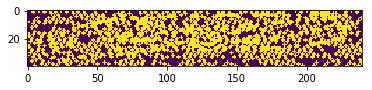

In [205]:
plt.imshow(masked)

In [206]:
src = cv2.inpaint(img, masked, 3, cv2.INPAINT_NS)

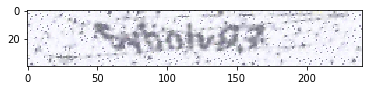

In [207]:
plt.imshow(src)

In [210]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (1,2))
dst = cv2.dilate(src, kernel)

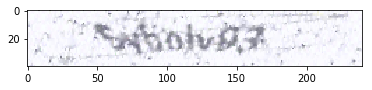

In [212]:
plt.imshow(dst)

In [213]:
blur =cv2.blur(dst, (5,5))

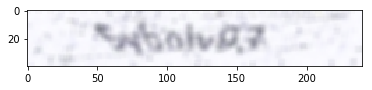

In [214]:
plt.imshow(blur)

In [247]:
filtered = cv2.bilateralFilter(blur, 5, 75, 75)

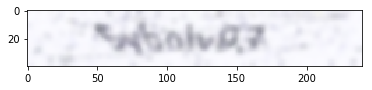

In [248]:
plt.imshow(filtered)

In [249]:
filtered = cv2.cvtColor(filtered, cv2.COLOR_BGR2GRAY) 
thresh = cv2.threshold(filtered, 10, 255, cv2.THRESH_OTSU)

In [250]:
thresh

(219.0, array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8))

In [251]:
cv2.imwrite("thresh.png", thresh)

TypeError: img is not a numerical tuple